In [1]:
#Some standard imports for all things python!
import numpy as np # For numerical operations
import scipy as sp # For scientific operations

import os
import subprocess
import sys
from IPython.display import Image

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker #For adjusting the location frequency of ticks 
import matplotlib.image as mpimg
import matplotlib.animation as animation


In [2]:
#In case you don't have the required packages, we can install them for you

try:
    from ase.io import read, write
    import ase
    import ase.visualize
    from ase.visualize import plot
    from ase.build import molecule
except ImportError:
    print("No ASE found. Installing it now.")
    subprocess.run(["pip", "install", "ase"])
try:
    import pyGDM2
except ImportError:
    print("No GDM found. Installing it now.")
    subprocess.run(["pip", "install", "pyGDM2"])

In [3]:
#Now we add in those sub-modules that we have been developing
sys.path.insert(0, 'Light/'); sys.path.insert(0, 'Building/')

#This is a bit of a bullshit way to do this, but it works for now
from Light import Spectra, Epsilon_ExpClass #For optical response with the pygdm package 
from Light import nearfield, Epsilon_ExpClass #For optical response with the pygdm package 

#Turns out these are busted! One of us (likely Rob) will need to fix this :')
from Building.nano_oct import Nanoct 
from Building.nanodeca import Nanodeca
from Building.nanoico import Nanoalloy

In [4]:
#from Light.Epsilon_ExpClass import Ag
#import nearfield

#near = nearfield.NearFieldSimulator(
        #structure_file="Structures/Ag_Ih_2057.xyz",
        #material= Ag,  # From Epsilon_ExpClass
        #step_size=2.88)

#near.setup_simulation(wavelength=500, polarization='linear')  # example
#near.calculate_nearfield()
#near.plot_enhancement()

In [5]:
#For some reason this is turbo-fucked for now :(
Nanoalloy.create_alloy_ico(['Cu','Au', "Pt"], 4, 3.65, "4_layers.xyz")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

MovieWriter imagemagick unavailable; using Pillow instead.


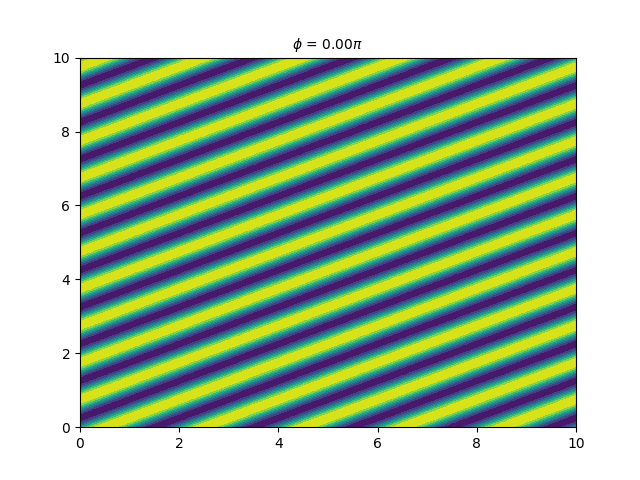

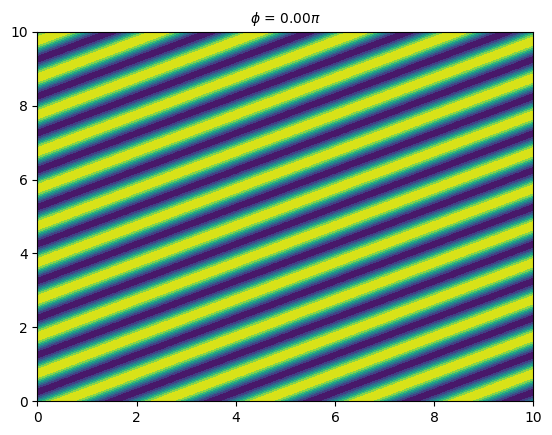

In [ ]:
# Define the wave parameters
amplitude = 1.0
wavelength = 2.0
omega = 1.0
phi = 0.0

# Create a meshgrid for the xy plane
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
# Generate numbers from 1 to 10
times = np.linspace(0, 6 * np.pi, 75)
# Calculate the plane wave

#for phi in times:
#    Z = amplitude * np.sin(2 * np.pi * (X / wavelength - omega * Y) + phi)#
#
#    # Plot the plane wave
#    fig, ax = plt.subplots()
#    contour = ax.contourf(X, Y, Z, cmap='viridis')
#    fig.colorbar(contour)
#    plt.show()
    
# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Function to update the frame
def update(phi):
    Z = amplitude * np.sin(2 * np.pi * (X / wavelength - omega * Y) + phi)
    ax.clear()
    contour = ax.contourf(X, Y, Z, cmap='viridis')
    ax.text(0.5, 1.01, "$\phi$ = %.2f$\pi$"%(phi/np.pi), horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
    return contour

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=times, blit=False)

# Save the animation as a gif
ani.save('plane_wave.gif', writer='imagemagick')

Image(filename="plane_wave.gif")


In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/Ag_147.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation

#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

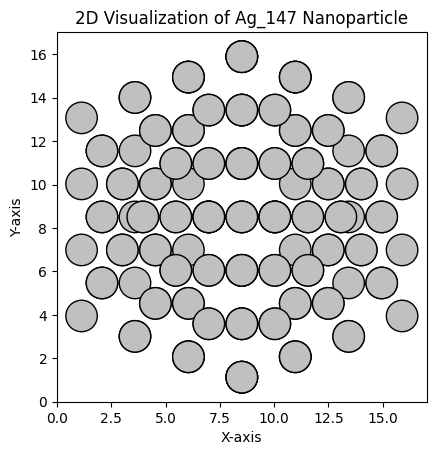

In [ ]:
import matplotlib.pyplot as plt
from ase.io import read
from ase.visualize.plot import plot_atoms  # Import plot_atoms

# Load the nanoparticle structure
ag = read("structures/Ag_147.xyz")

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Plot the nanoparticle on the axis
plot_atoms(ag, ax, radii=0.5)

# Customize the plot
ax.set_title("2D Visualization of Ag_147 Nanoparticle")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Save the plot
plt.savefig("output.png", dpi=300, bbox_inches="tight")
plt.show()

c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:1010: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.102924397028415
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(distsum))


structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 147/147 dipoles valid


c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


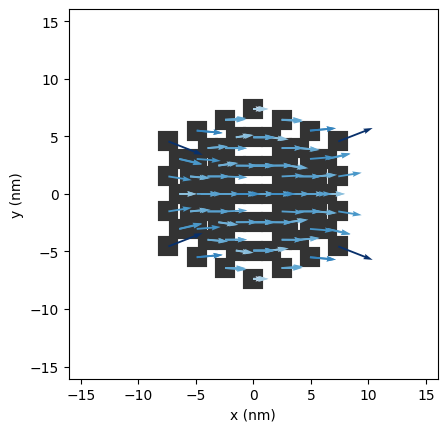

In [ ]:
spec = Spectra.Spectrum("Structures/Ag_147.xyz")

config 0 : {'theta': 0}


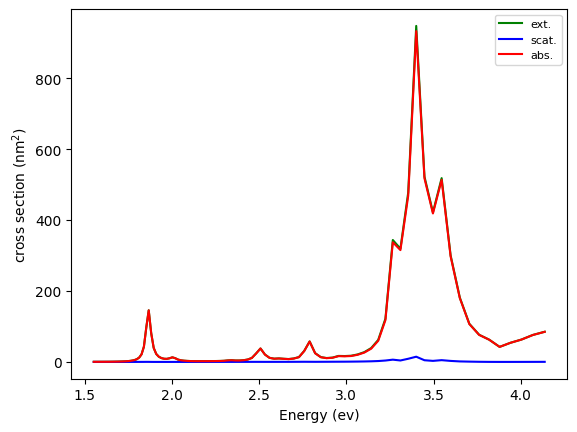

In [ ]:
spec.Plot_Spectrum_En()

config 0 : {'theta': 0}


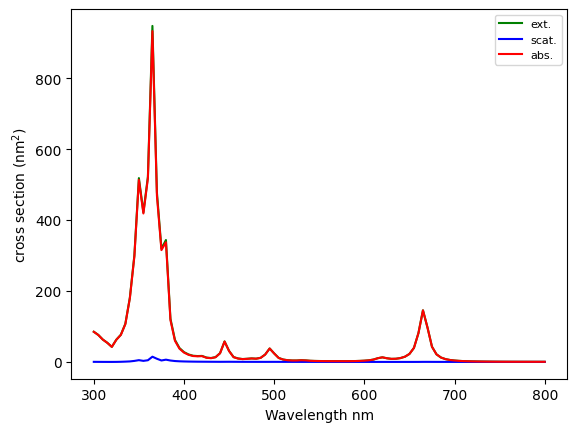

In [ ]:
spec.Plot_Spectrum_Wl()

config 0 : {'theta': 0}


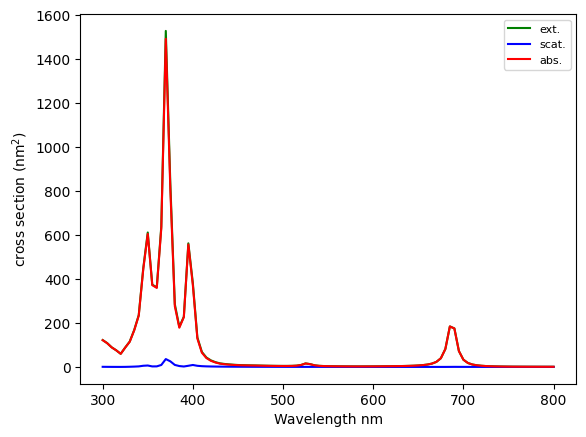

=== Extinction Maxima ===
Peak 1: 350.0 nm, 611.4 nm²
Peak 2: 370.0 nm, 1528.1 nm²
Peak 3: 395.0 nm, 562.1 nm²

=== Scattering Maxima ===
Peak 1: 370.0 nm, 35.7 nm²

=== Absorption Maxima ===
Peak 1: 350.0 nm, 605.0 nm²
Peak 2: 370.0 nm, 1492.4 nm²
Peak 3: 395.0 nm, 556.8 nm²


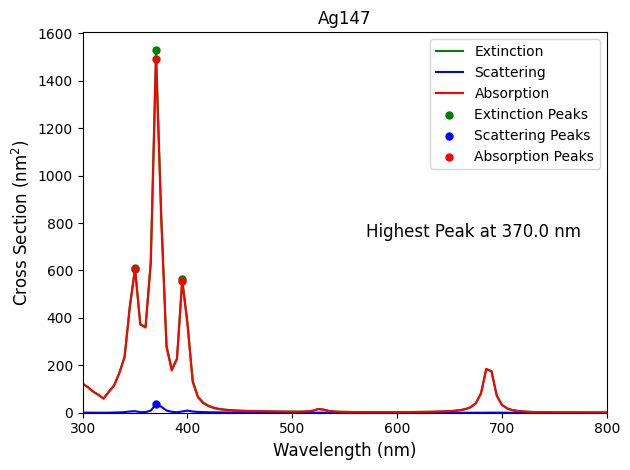

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("Ag147")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
spec.Plot_EField()


KeyboardInterrupt: 

In [ ]:
# In your notebook cell
from Light.Spectra import Spectrum  # Adjust path as needed
print("Import successful!")  # Should print if no errors

Import successful!


In [ ]:
import os
print(os.path.abspath("Light/Spectra.py"))  # Check correct path
print(os.listdir("Light"))  # Verify file exists

c:\CMNP\CMNPs-main\Light\Spectra.py
['Epsilon_ExpClass.py', 'nearfield.py', 'Spectra.py', '__init__.py', '__pycache__']


In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/Ag_344.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation


#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 344/344 dipoles valid


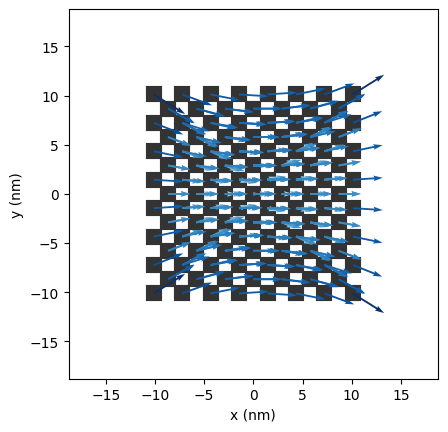

In [ ]:
spec = Spectra.Spectrum("Structures/Ag_344.xyz")

config 0 : {'theta': 0}


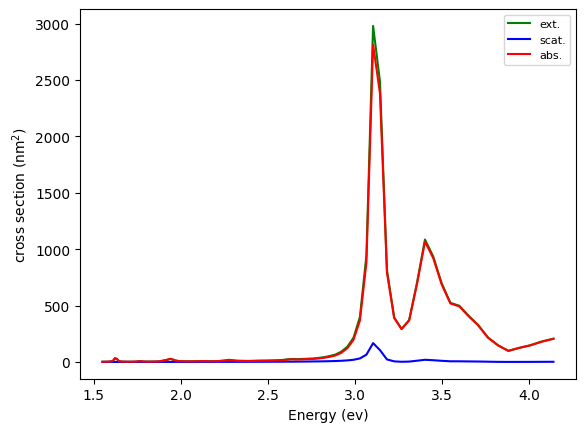

In [ ]:
spec.Plot_Spectrum_En()

config 0 : {'theta': 0}


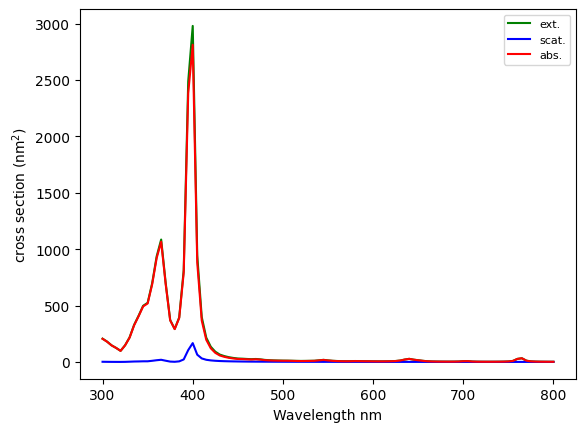

=== Extinction Maxima ===
Peak 1: 365.0 nm, 1085.6 nm²
Peak 2: 400.0 nm, 2979.7 nm²

=== Scattering Maxima ===
Peak 1: 400.0 nm, 166.9 nm²

=== Absorption Maxima ===
Peak 1: 365.0 nm, 1066.5 nm²
Peak 2: 400.0 nm, 2812.8 nm²


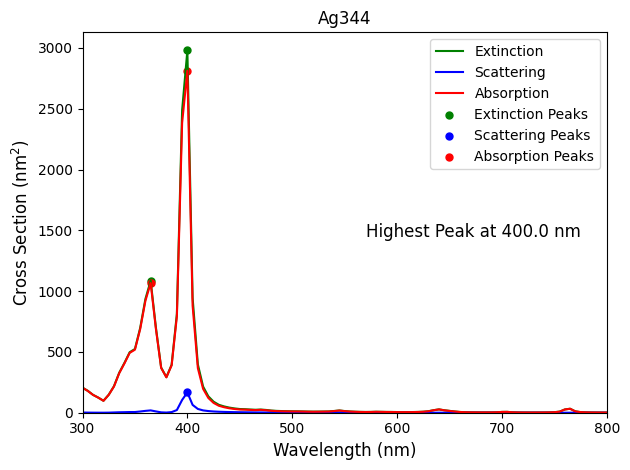

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("Ag344")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E-FieldStructures/Ag_344.png'

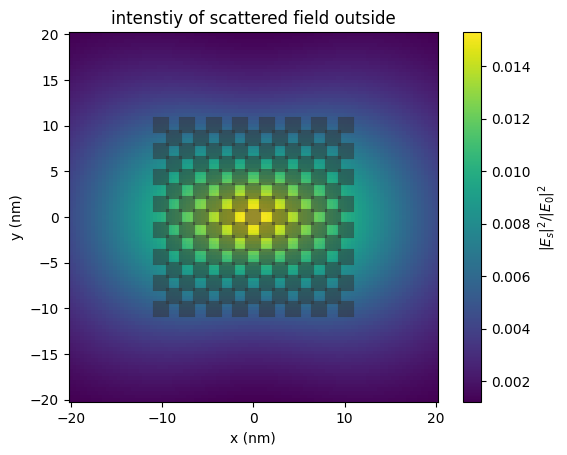

In [ ]:
spec.Plot_EField()

In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/AuOh344.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation


#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 344/344 dipoles valid


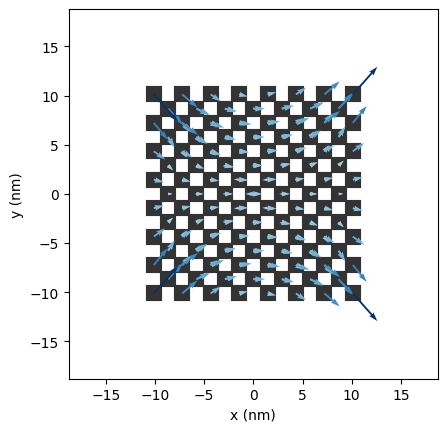

In [ ]:
spec = Spectra.Spectrum("Structures/AuOh344.xyz")

config 0 : {'theta': 0}


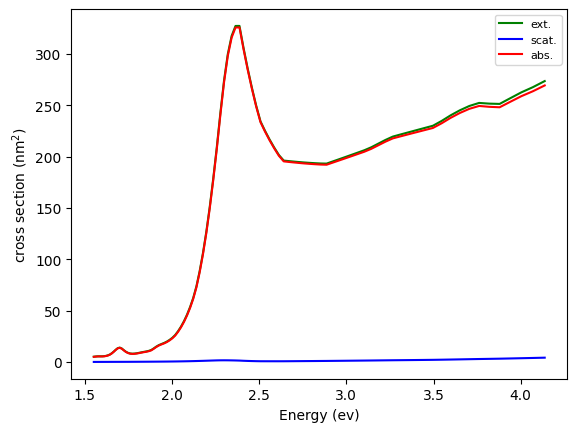

In [ ]:
spec.Plot_Spectrum_En()

config 0 : {'theta': 0}


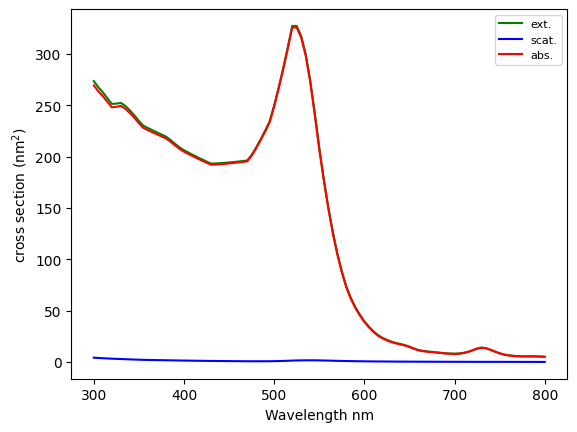

=== Extinction Maxima ===
Peak 1: 520.0 nm, 327.4 nm²

=== Scattering Maxima ===

=== Absorption Maxima ===
Peak 1: 330.0 nm, 249.5 nm²
Peak 2: 520.0 nm, 326.0 nm²


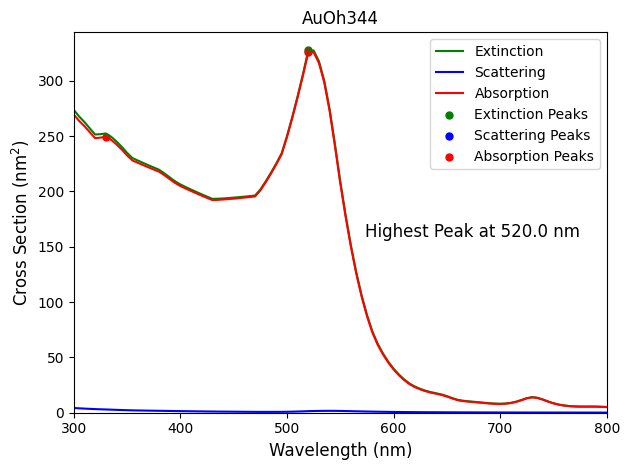

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("AuOh344")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E-FieldStructures/AuOh344.png'

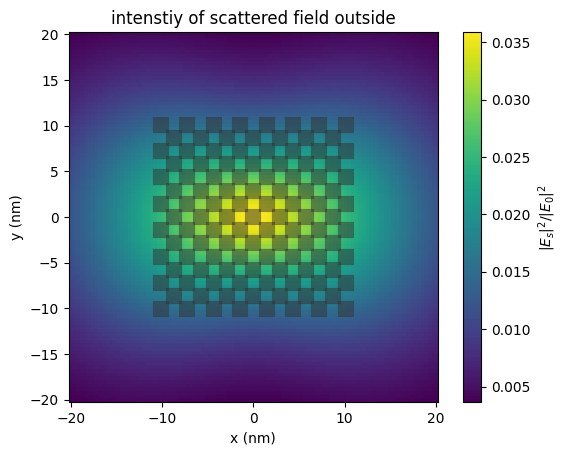

In [ ]:
spec.Plot_EField()

In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/Ni887_MDh453.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation


#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:1010: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.00589952779294
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(distsum))
c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:821: UserWarning: Inconsistent structure!!! 887 of 887 dipoles don't match with step=2.88nm.
  warnings.warn("Inconsistent structure!!! {} of {} dipoles don't match with step={:.2f}nm.".format(
c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\structures.py:176: UserWarning: using only consistent part of structure. Please verify the geometry.
  warnings.warn(
c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\structures.py:217: UserWarning: Emtpy structure geometry.
  warnings.warn("Emtpy structure geometry.")
c:\CMNP\CMNPs-main\venv\lib\site-packages\numpy\lib\_function_base_impl.py:562: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\CMNP\CMNPs-main\venv\

structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 0/887 dipoles valid


c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:821: UserWarning: Inconsistent structure!!! 887 of 887 dipoles don't match with step=2.83nm.
  warnings.warn("Inconsistent structure!!! {} of {} dipoles don't match with step={:.2f}nm.".format(
c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:1010: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.005901677963672
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(distsum))
c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:821: UserWarning: Inconsistent structure!!! 887 of 887 dipoles don't match with step=2.82nm.
  warnings.warn("Inconsistent structure!!! {} of {} dipoles don't match with step={:.2f}nm.".format(
c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:821: UserWarning: Inconsistent structure!!! 887 of 887 dipoles don't match with step=2.81nm.
  warnings.warn("Inconsistent structure!!! {} of {} dipoles don't match with step={:.2f}nm."

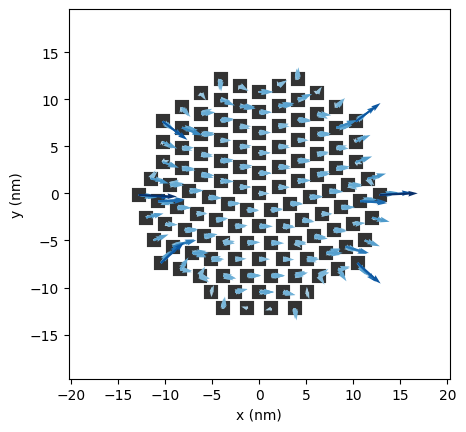

In [ ]:
spec = Spectra.Spectrum("Structures/Ni887_MDh453.xyz")

config 0 : {'theta': 0}


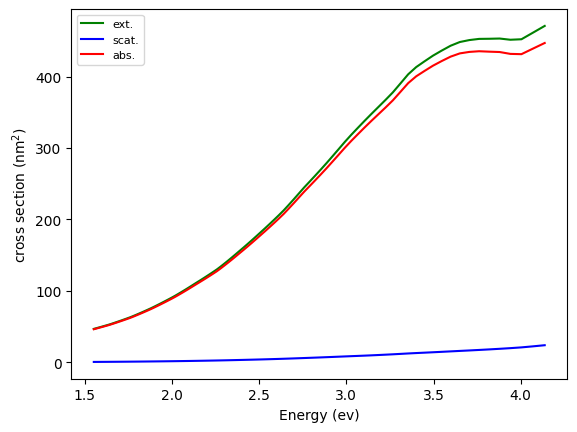

In [ ]:
spec.Plot_Spectrum_En()

config 0 : {'theta': 0}


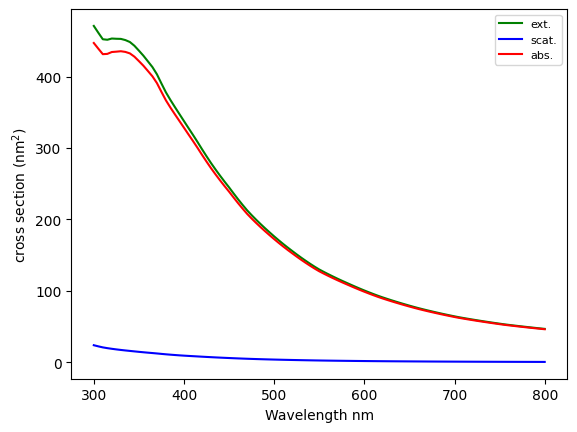

=== Extinction Maxima ===
Peak 1: 320.0 nm, 453.3 nm²

=== Scattering Maxima ===

=== Absorption Maxima ===
Peak 1: 330.0 nm, 435.6 nm²


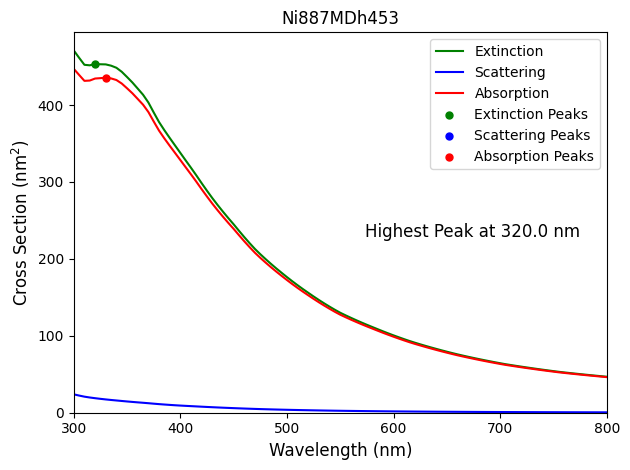

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("Ni887MDh453")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E-FieldStructures/Ni887_MDh453.png'

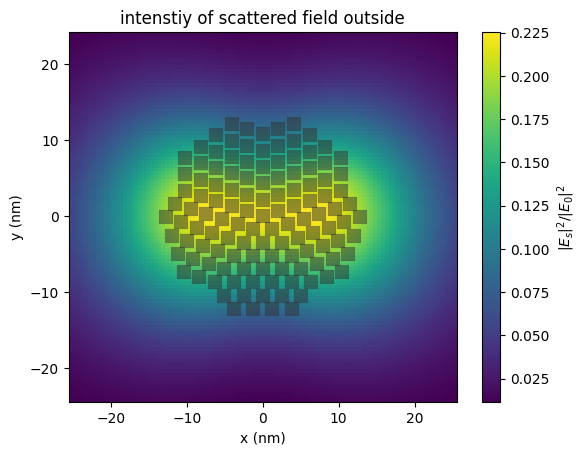

In [ ]:
spec.Plot_EField()

In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/Pt147Dh441_rlx.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation


#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:1010: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.443346288915219
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(distsum))
c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:821: UserWarning: Inconsistent structure!!! 147 of 147 dipoles don't match with step=2.88nm.
  warnings.warn("Inconsistent structure!!! {} of {} dipoles don't match with step={:.2f}nm.".format(
c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:821: UserWarning: Inconsistent structure!!! 147 of 147 dipoles don't match with step=2.87nm.
  warnings.warn("Inconsistent structure!!! {} of {} dipoles don't match with step={:.2f}nm.".format(
c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:1010: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.445952340615344
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(

structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 0/147 dipoles valid


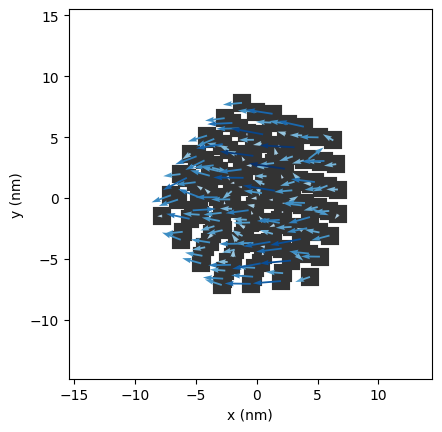

In [ ]:
spec = Spectra.Spectrum("Structures/Pt147Dh441_rlx.xyz")

config 0 : {'theta': 0}


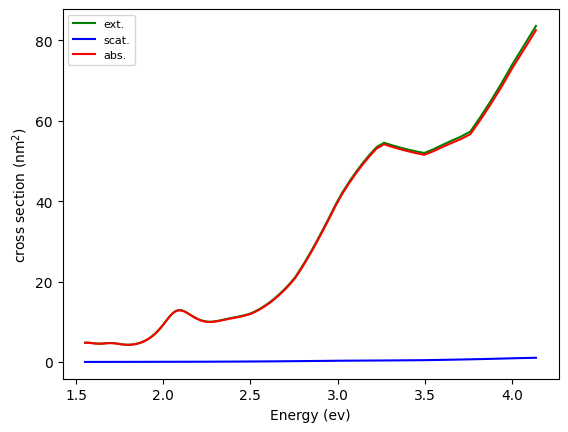

In [ ]:
spec.Plot_Spectrum_En()       

config 0 : {'theta': 0}


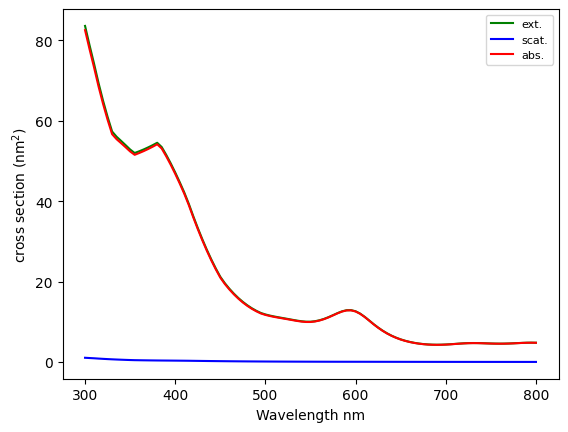

=== Extinction Maxima ===
Peak 1: 380.0 nm, 54.5 nm²
Peak 2: 595.0 nm, 12.9 nm²

=== Scattering Maxima ===

=== Absorption Maxima ===
Peak 1: 380.0 nm, 54.1 nm²
Peak 2: 595.0 nm, 12.8 nm²


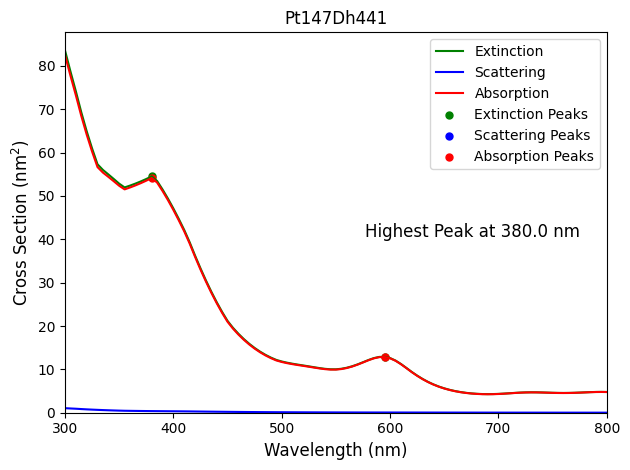

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("Pt147Dh441")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E-FieldStructures/Pt147Dh441_rlx.png'

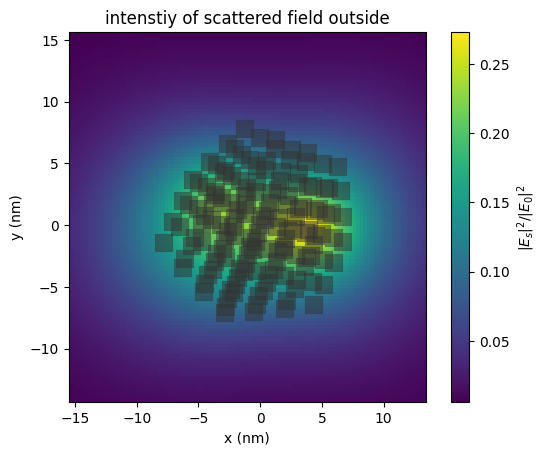

In [ ]:
spec.Plot_EField()

In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/Au_Ih_2057.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation

#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

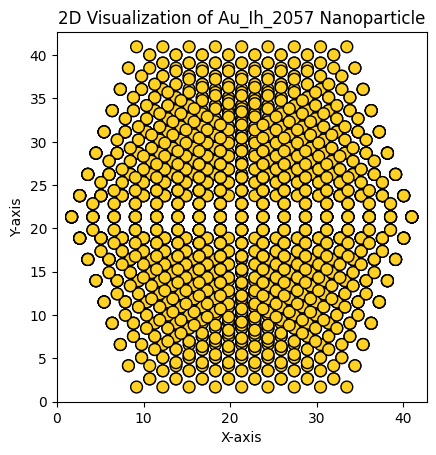

In [ ]:
import matplotlib.pyplot as plt
from ase.io import read
from ase.visualize.plot import plot_atoms  # Import plot_atoms

# Load the nanoparticle structure
ag = read("structures/Au_Ih_2057.xyz")

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Plot the nanoparticle on the axis
plot_atoms(ag, ax, radii=0.5)

# Customize the plot
ax.set_title("2D Visualization of Au_Ih_2057 Nanoparticle")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Save the plot
plt.savefig("output.png", dpi=300, bbox_inches="tight")
plt.show()

c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:1010: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.154386682407388
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(distsum))


structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 2057/2057 dipoles valid


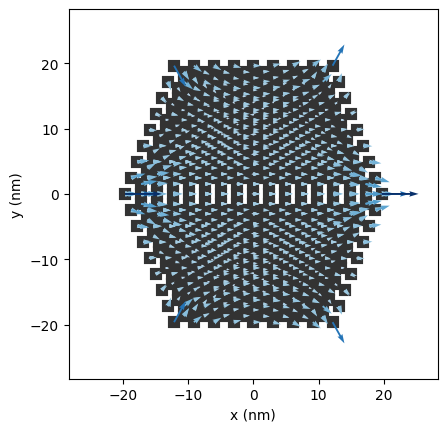

In [ ]:
spec = Spectra.Spectrum("Structures/Au_Ih_2057.xyz")

config 0 : {'theta': 0}


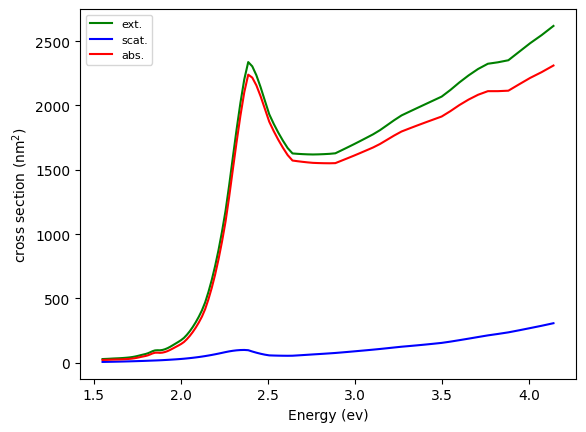

In [ ]:
spec.Plot_Spectrum_En()

config 0 : {'theta': 0}


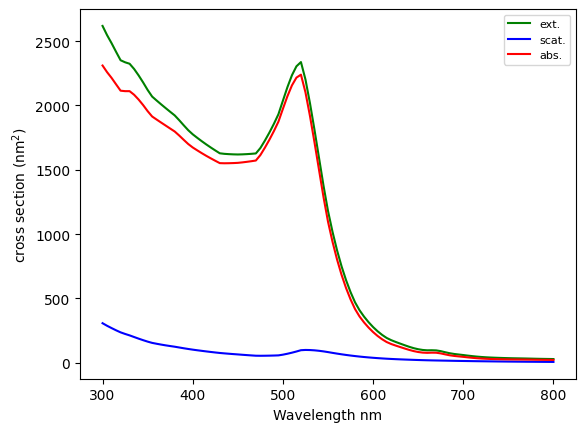

=== Extinction Maxima ===
Peak 1: 520.0 nm, 2337.3 nm²

=== Scattering Maxima ===
Peak 1: 525.0 nm, 99.9 nm²

=== Absorption Maxima ===
Peak 1: 520.0 nm, 2239.3 nm²


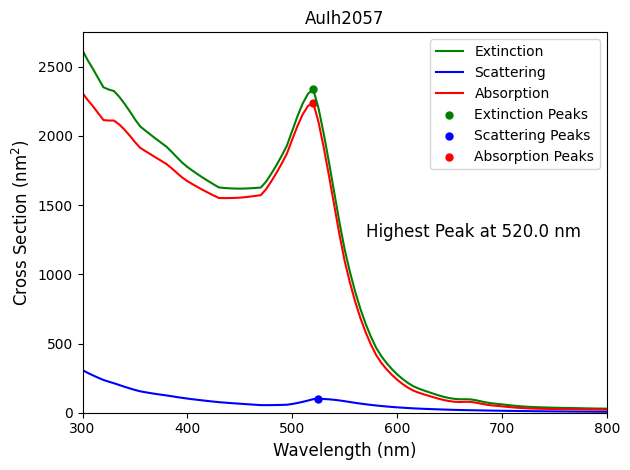

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("AuIh2057")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E-FieldStructures/Au_Ih_2057.png'

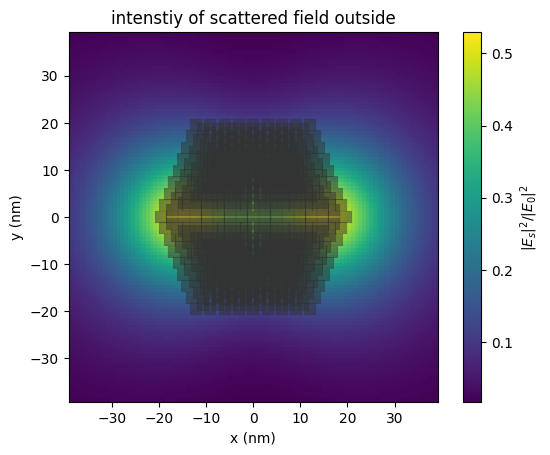

In [ ]:
spec.Plot_EField()

In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/Ag_Ih_2057.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation

#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:1010: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.102924468365021
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(distsum))


structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 2057/2057 dipoles valid


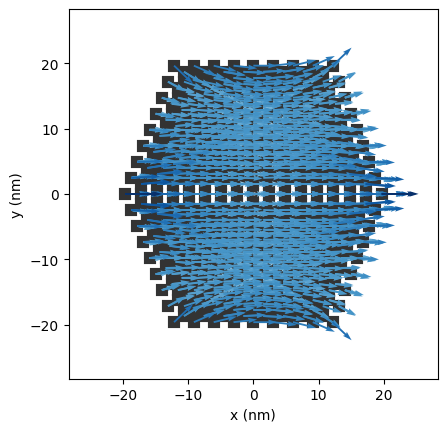

In [ ]:
spec = Spectra.Spectrum("Structures/Ag_Ih_2057.xyz")

config 0 : {'theta': 0}


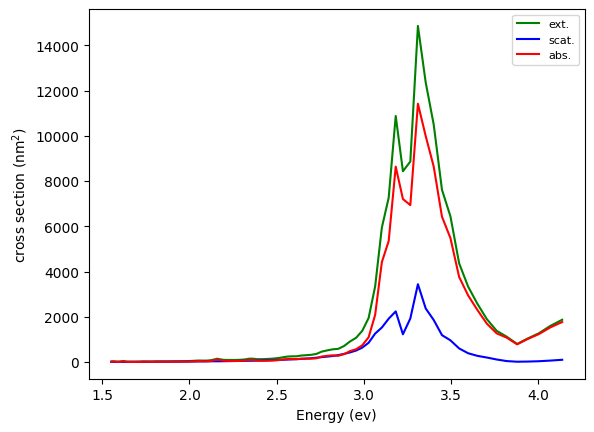

In [ ]:
spec.Plot_Spectrum_En()

config 0 : {'theta': 0}


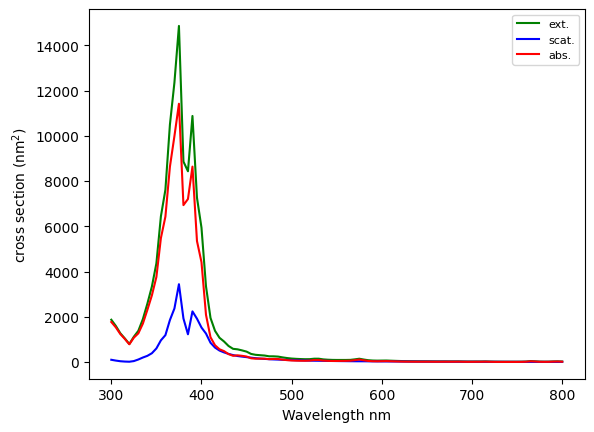

=== Extinction Maxima ===
Peak 1: 375.0 nm, 14858.1 nm²
Peak 2: 390.0 nm, 10877.8 nm²

=== Scattering Maxima ===
Peak 1: 375.0 nm, 3440.2 nm²
Peak 2: 390.0 nm, 2238.9 nm²

=== Absorption Maxima ===
Peak 1: 375.0 nm, 11417.9 nm²
Peak 2: 390.0 nm, 8638.8 nm²


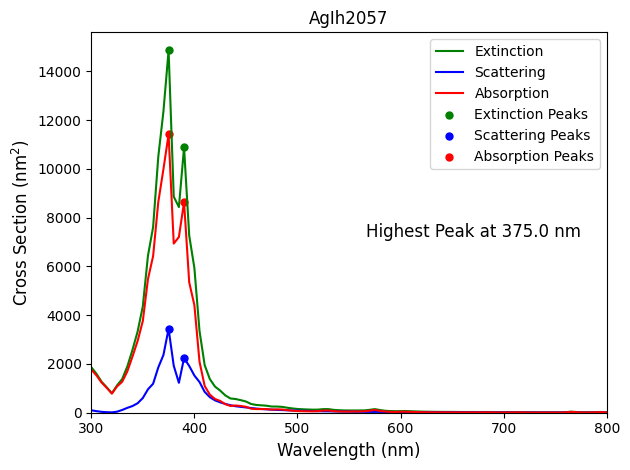

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("AgIh2057")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E-FieldStructures/Ag_Ih_2057.png'

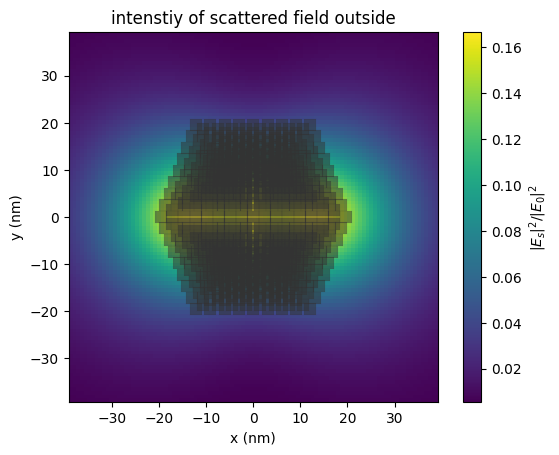

In [ ]:
spec.Plot_EField()

In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/Cu_Ih_2057.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation

#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 2057/2057 dipoles valid


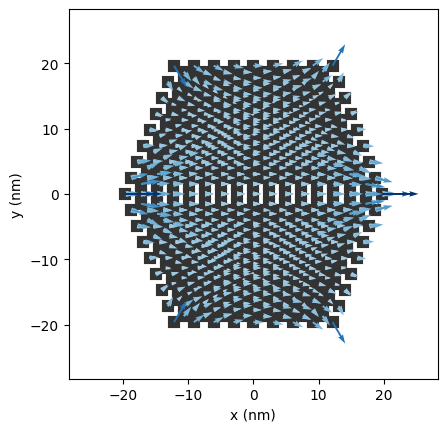

In [ ]:
spec = Spectra.Spectrum("Structures/Cu_Ih_2057.xyz")

config 0 : {'theta': 0}


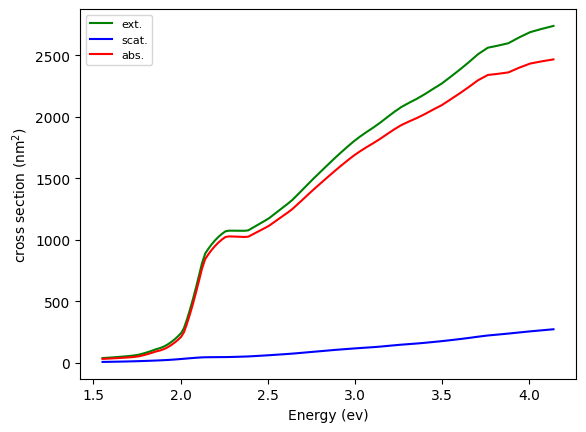

In [ ]:
spec.Plot_Spectrum_En()


config 0 : {'theta': 0}


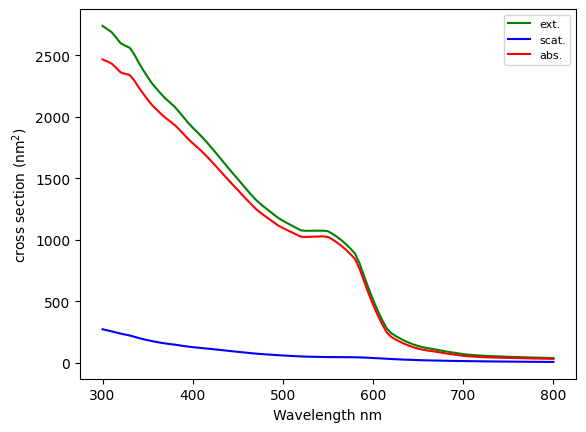

=== Extinction Maxima ===
Peak 1: 545.0 nm, 1074.6 nm²

=== Scattering Maxima ===

=== Absorption Maxima ===
Peak 1: 545.0 nm, 1028.0 nm²


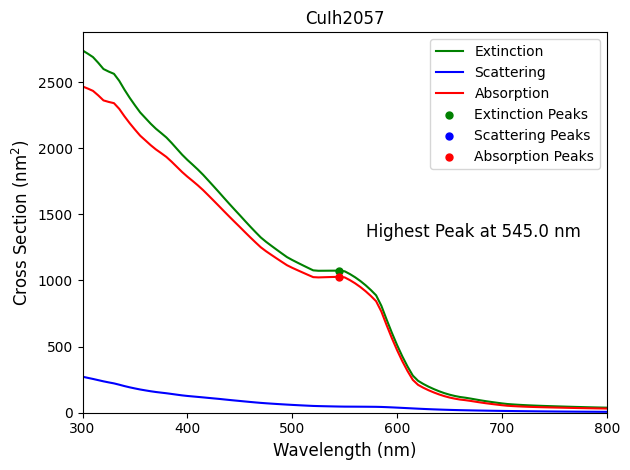

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("CuIh2057")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E-FieldStructures/Cu_Ih_2057.png'

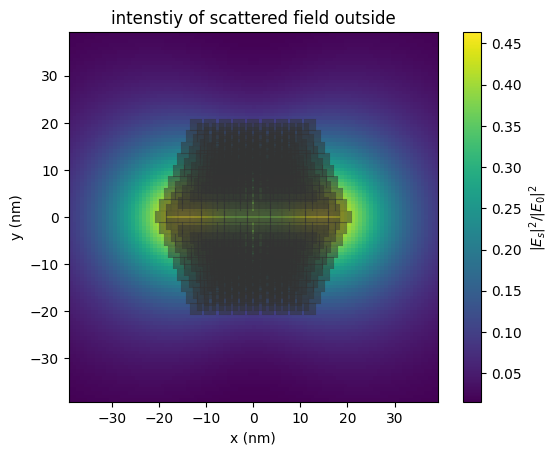

In [ ]:
spec.Plot_EField()

In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/Au1103_mDh_662.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation

#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

c:\CMNP\CMNPs-main\venv\lib\site-packages\pyGDM2\tools.py:1010: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.00590196531225
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(distsum))


structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 1103/1103 dipoles valid


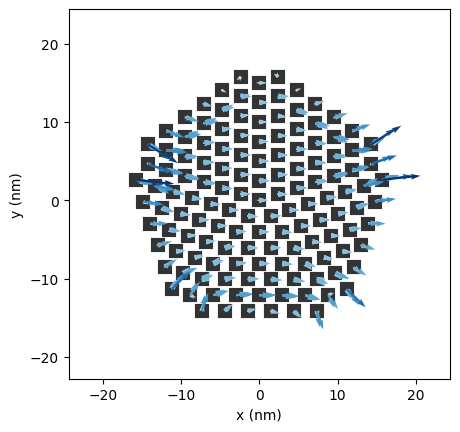

In [ ]:
spec = Spectra.Spectrum("Structures/Au1103_mDh_662.xyz")

config 0 : {'theta': 0}


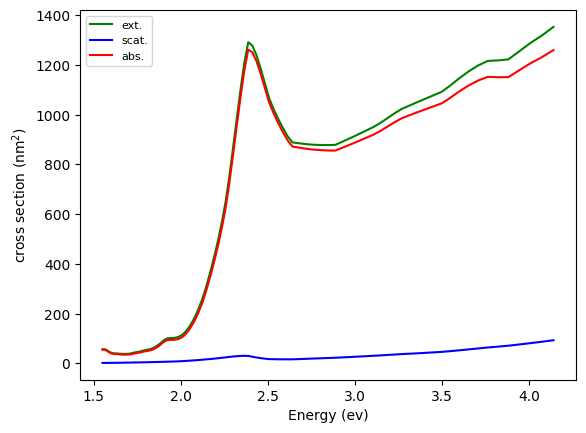

In [ ]:
spec.Plot_Spectrum_En()

config 0 : {'theta': 0}


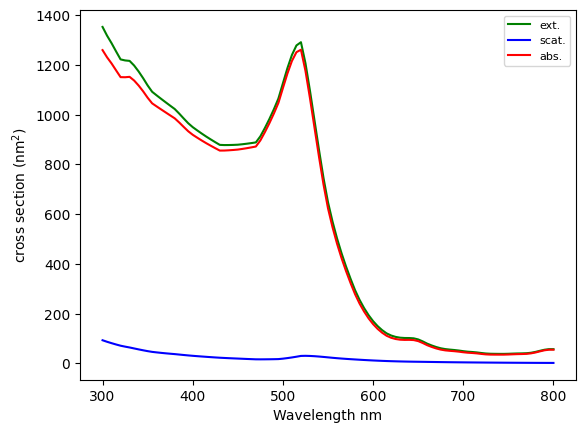

=== Extinction Maxima ===
Peak 1: 520.0 nm, 1290.7 nm²

=== Scattering Maxima ===
Peak 1: 525.0 nm, 30.6 nm²

=== Absorption Maxima ===
Peak 1: 330.0 nm, 1151.5 nm²
Peak 2: 520.0 nm, 1260.5 nm²


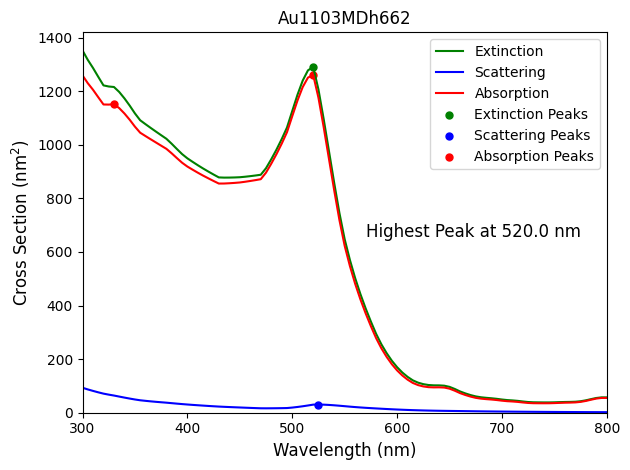

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("Au1103MDh662")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E-FieldStructures/Au1103_mDh_662.png'

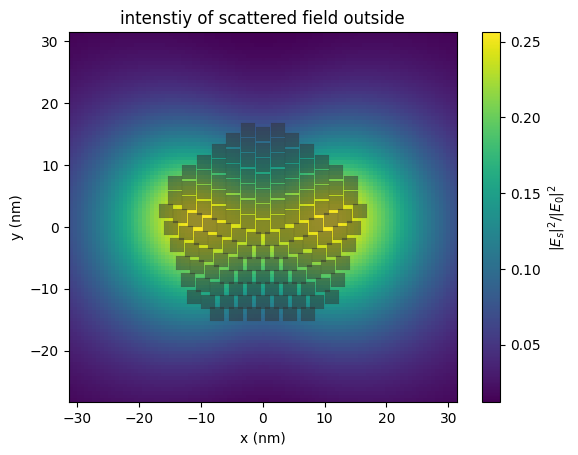

In [ ]:
spec.Plot_EField()

In [ ]:
#Let's load in a frinedly little nanoparticle and visualize it
from ase.io import read
import ase.visualize

ag = read("Structures/Au891_Oh.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation

#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 891/891 dipoles valid


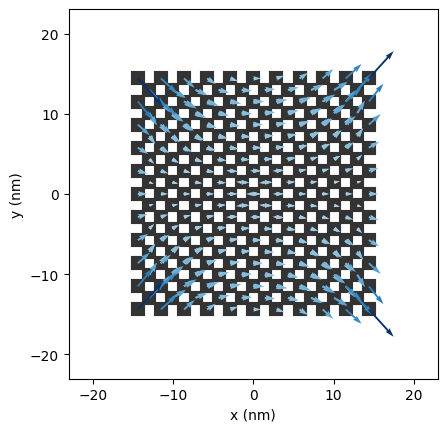

In [ ]:
spec = Spectra.Spectrum("Structures/Au891_Oh.xyz")

config 0 : {'theta': 0}


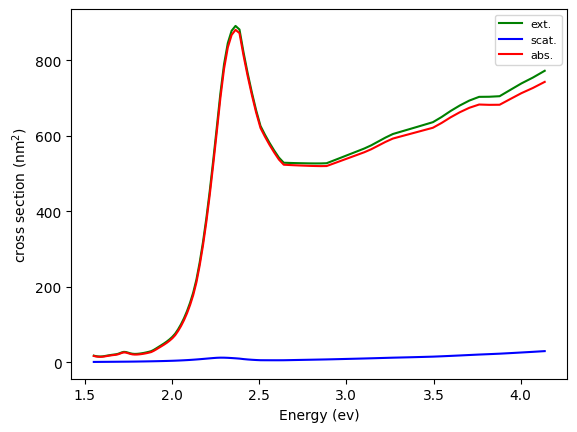

In [ ]:
spec.Plot_Spectrum_En()

config 0 : {'theta': 0}


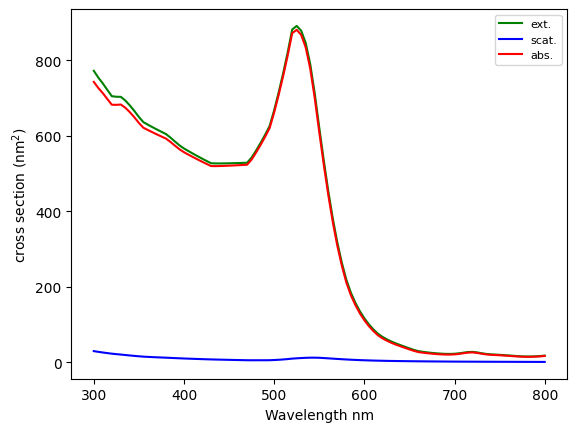

=== Extinction Maxima ===
Peak 1: 525.0 nm, 890.6 nm²

=== Scattering Maxima ===
Peak 1: 545.0 nm, 12.1 nm²

=== Absorption Maxima ===
Peak 1: 525.0 nm, 880.2 nm²


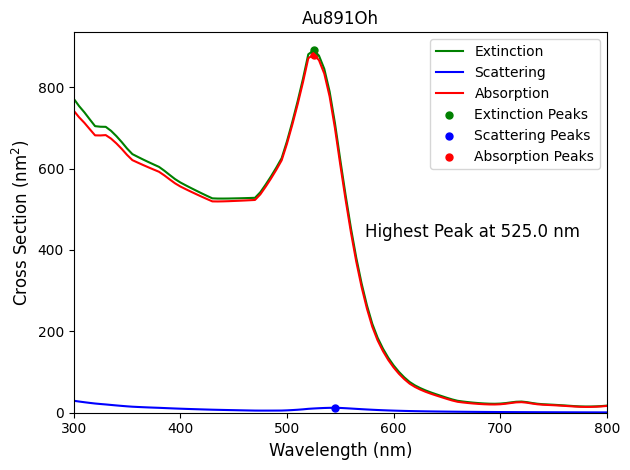

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("Au891Oh")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E-FieldStructures/Au891_Oh.png'

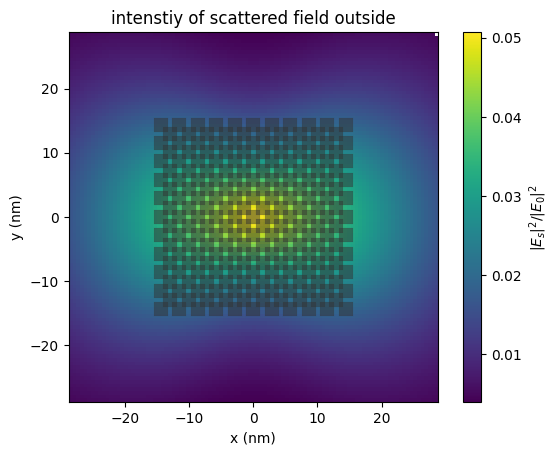

In [ ]:
spec.Plot_EField()

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 64/64 dipoles valid


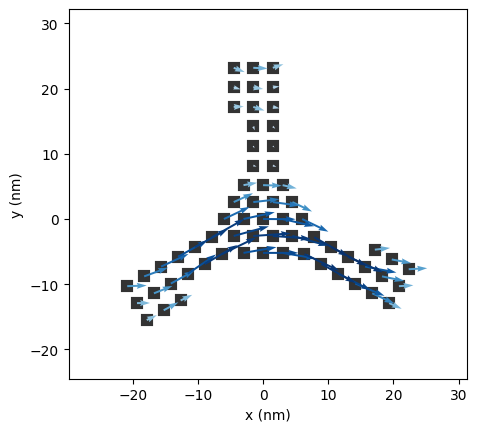

In [16]:
spec = Spectra.Spectrum("Structures/Gamm_3_L.xyz")

config 0 : {'theta': 0}


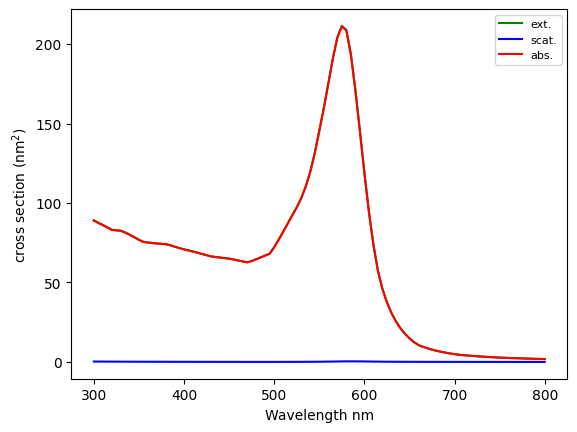

=== Extinction Maxima ===
Peak 1: 575.0 nm, 211.4 nm²

=== Scattering Maxima ===

=== Absorption Maxima ===
Peak 1: 575.0 nm, 211.1 nm²


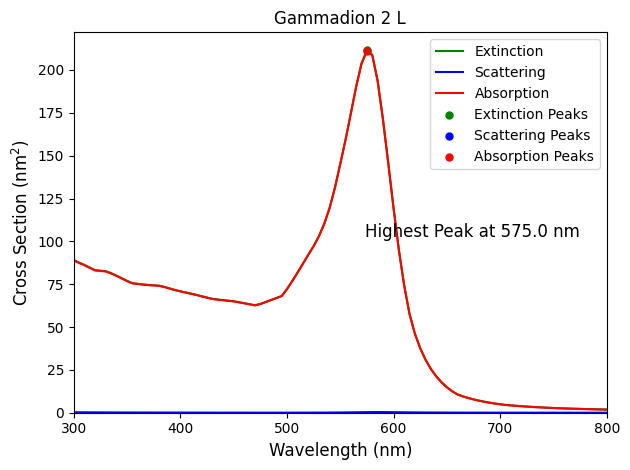

In [17]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

spec.Plot_Spectrum_Wl()

# Load data
ex = spec.spectrum.T[0]  # Extinction (green)
sca = spec.spectrum.T[1]  # Scattering (blue)
ab = spec.spectrum.T[2]   # Absorption (red)

# Create wavelength array (300-800 nm)
wavelengths = np.linspace(300, 800, len(ex))

# Find peaks (adjust thresholds as needed)
peaks_ex, _ = find_peaks(ex, height=0.15*np.max(ex), prominence=1)
peaks_sca, _ = find_peaks(sca, height=0.25*np.max(sca), prominence=1)
peaks_ab, _ = find_peaks(ab, height=0.15*np.max(ab), prominence=1)

# Plot lines (starting at x=300 nm)
plt.plot(wavelengths, ex, 'g-', label='Extinction', linewidth=1.5)
plt.plot(wavelengths, sca, 'b-', label='Scattering', linewidth=1.5)
plt.plot(wavelengths, ab, 'r-', label='Absorption', linewidth=1.5)

# Plot peaks with smaller dots (markersize=5)
plt.scatter(wavelengths[peaks_ex], ex[peaks_ex], color='green', marker='o', s=25, label='Extinction Peaks')
plt.scatter(wavelengths[peaks_sca], sca[peaks_sca], color='blue', marker='o', s=25, label='Scattering Peaks')
plt.scatter(wavelengths[peaks_ab], ab[peaks_ab], color='red', marker='o', s=25, label='Absorption Peaks')

print("=== Extinction Maxima ===")
for i, peak in enumerate(peaks_ex):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ex[peak]:.1f} nm²")

print("\n=== Scattering Maxima ===")
for i, peak in enumerate(peaks_sca):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {sca[peak]:.1f} nm²")

print("\n=== Absorption Maxima ===")
for i, peak in enumerate(peaks_ab):
    print(f"Peak {i+1}: {wavelengths[peak]:.1f} nm, {ab[peak]:.1f} nm²")

# Determine which peak is globally highest and retrieve its wavelength
best_peak_cs = 0.0   # best cross-section found so far
best_peak_wl = 0.0   # wavelength corresponding to the best cross-section

# Check extinction peaks
if len(peaks_ex) > 0:
    idx_max_ex = np.argmax(ex[peaks_ex])
    if ex[peaks_ex][idx_max_ex] > best_peak_cs:
        best_peak_cs = ex[peaks_ex][idx_max_ex]
        best_peak_wl = wavelengths[peaks_ex][idx_max_ex]

# Check scattering peaks
if len(peaks_sca) > 0:
    idx_max_sca = np.argmax(sca[peaks_sca])
    if sca[peaks_sca][idx_max_sca] > best_peak_cs:
        best_peak_cs = sca[peaks_sca][idx_max_sca]
        best_peak_wl = wavelengths[peaks_sca][idx_max_sca]

# Check absorption peaks
if len(peaks_ab) > 0:
    idx_max_ab = np.argmax(ab[peaks_ab])
    if ab[peaks_ab][idx_max_ab] > best_peak_cs:
        best_peak_cs = ab[peaks_ab][idx_max_ab]
        best_peak_wl = wavelengths[peaks_ab][idx_max_ab]

# Add annotation for the highest peak's wavelength (below the legend)
plt.annotate(
    f'Highest Peak at {best_peak_wl:.1f} nm', 
    xy=(0.95, 0.50),  # move down from the legend (upper-right)
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='top'
)

# Axes limits to ensure lines start at y-axis (x=300 nm)
plt.xlim(300, 800)  # Explicitly set x-axis range
plt.ylim(0, None)   # Start y-axis at 0

# Labels and legend
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel("Cross Section (nm$^2$)", fontsize=12)
plt.title("Gammadion 2 L")
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()
